#                                      PROJET  IA

#                                         MASTER 1


# SOULEYMANE DAFFE        M1-LMDS1


#### importation des lib

In [1]:
import pandas as pd
import re
from gensim.models import Word2Vec

import numpy as np

In [2]:
import pandas as pd
import numpy as np
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split


### Accées des données

In [4]:
data=pd.concat([
    pd.read_excel(r"C:\Users\DAFFE\Desktop\Projet IA\dalanda_csv.xlsx"),
    pd.read_excel(r"C:\Users\DAFFE\Desktop\Projet IA\aissatou_csv.xlsx"),         
    pd.read_excel(r"C:\Users\DAFFE\Desktop\Projet IA\mon_csv.xlsx"),
    pd.read_excel(r"C:\Users\DAFFE\Desktop\Projet IA\mame_diarra_csv.xlsx"),
    pd.read_excel(r"C:\Users\DAFFE\Desktop\Projet IA\faniang.xlsx")

])

In [5]:
data

,Sources,Auteurs,Commentaires,Malade
0,https://x.com/claire_vantours/status/171715658...,liza,Oufs,1
1,https://x.com/EmmanuelYeto/status/171717036767...,YETO Emmanuel,Nous savons tous que c'est faut Par contre on ...,0
2,https://x.com/patou_quesney/status/17172195592...,Patou&Georges,je ne crois jamais ce genre de bêtises !!!! à ...,0
3,https://x.com/Matsenmax/status/171714570288566...,Max Matsen,je ne peux pas croire qu'il y a des gens qui t...,0
4,https://x.com/ZeppeliMarioo/status/17170974706...,Zeppeli Mario,"Si on en croit les médias, depuis le début de ...",0
...,...,...,...,...
337,https://www.geo.fr/geopolitique/que-sait-on-de...,User5337,elle annoncé au début du mois de mai l'opérati...,1
338,https://www.geo.fr/geopolitique/que-sait-on-de...,User5338,Une enquête solide de Proekt soulève de son cô...,1
339,https://www.geo.fr/geopolitique/que-sait-on-de...,User5339,"ès malade"" et est atteint ""d'un cancer du sang",1
340,https://www.youtube.com/watch?v=zA46aVy6lGs,User5340,Le Kremlin assure que Vladimir Poutine n'est p...,0


In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DAFFE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DAFFE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DAFFE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
# Fonction de prétraitement du texte
def preprocess_text(text):
    # Suppression des balises HTML
    text = re.sub(r'<.*?>', '', text)

    # Remplacement des contractions (si applicable)
    contractions = {
        "can't": "cannot",
        "won't": "will not",
        "n't": " not",
        "'re": " are",
        "'s": " is",
        "'d": " would",
        "'ll": " will",
        "'t": " not",
        "'ve": " have",
        "'m": " am"
    }
    for contraction, full_form in contractions.items():
        text = text.replace(contraction, full_form)

    # Suppression de la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Suppression des chiffres
    text = re.sub(r'\d+', '', text)

    # Conversion en minuscules
    text = text.lower()

    # Tokenisation
    tokens = word_tokenize(text)

    # Suppression des mots vides
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Appliquer le prétraitement au dataset
data['text'] = data['Commentaires'].apply(preprocess_text)
data.head()  # Afficher les premières lignes du dataframe pour vérifier le prétraitement

,Sources,Auteurs,Commentaires,Malade,text
0,https://x.com/claire_vantours/status/171715658...,liza,Oufs,1,oufs
1,https://x.com/EmmanuelYeto/status/171717036767...,YETO Emmanuel,Nous savons tous que c'est faut Par contre on ...,0,nous savons tous que cest faut par contre vu l...
2,https://x.com/patou_quesney/status/17172195592...,Patou&Georges,je ne crois jamais ce genre de bêtises !!!! à ...,0,je ne crois jamais ce genre de bêtises à part ...
3,https://x.com/Matsenmax/status/171714570288566...,Max Matsen,je ne peux pas croire qu'il y a des gens qui t...,0,je ne peux pa croire quil de gen qui tombent d...
4,https://x.com/ZeppeliMarioo/status/17170974706...,Zeppeli Mario,"Si on en croit les médias, depuis le début de ...",0,si en croit le médias depuis le début de la gu...


### Analyse de donnée

In [8]:
data.isna().sum()


Sources         0
Auteurs         0
Commentaires    0
Malade          0
text            0
dtype: int64

In [41]:
data.shape

(684, 5)

In [9]:
data.duplicated().sum()

0

In [10]:
data.Commentaires.iloc[3]

"je ne peux pas croire qu'il y a des gens qui tombent dans le panneau. C'est tellement gros...."

### proportion de 1 et 0

In [11]:
data.Malade.value_counts(normalize =True)

Malade
0    0.616959
1    0.383041
Name: proportion, dtype: float64

<Axes: ylabel='count'>

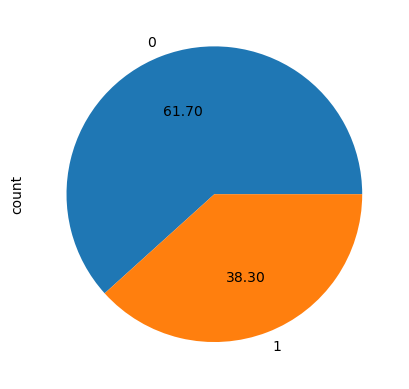

In [12]:

data.Malade.value_counts().plot(kind="pie", autopct="%1.2f")

In [13]:
# Entraîner le modèle Word2Vec
sentences = [text.split() for text in data['Commentaires']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [14]:
# Définir la fonction pour convertir le texte en embedding
def text_to_embedding(text, model):
    words = text.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

In [15]:
# Convertir le texte en embeddings
embeddings = data['Commentaires'].apply(lambda x: text_to_embedding(x, word2vec_model))
x = np.vstack(embeddings)
y = data['Malade'].values

   ### Division de donnée en 80% de Train et 20% de Test

In [16]:
# Diviser le dataset en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### la taille de donnée Train

In [17]:
print("Nombre de lignes dans x_train:", len(x_train))
print("Nombre de lignes dans y_train:", len(y_train))

Nombre de lignes dans x_train: 547
Nombre de lignes dans y_train: 547


### la taille de donnée Test

In [18]:
print("Nombre de lignes dans x_train:", len(x_test))
print("Nombre de lignes dans y_train:", len(y_test))

Nombre de lignes dans x_train: 137
Nombre de lignes dans y_train: 137


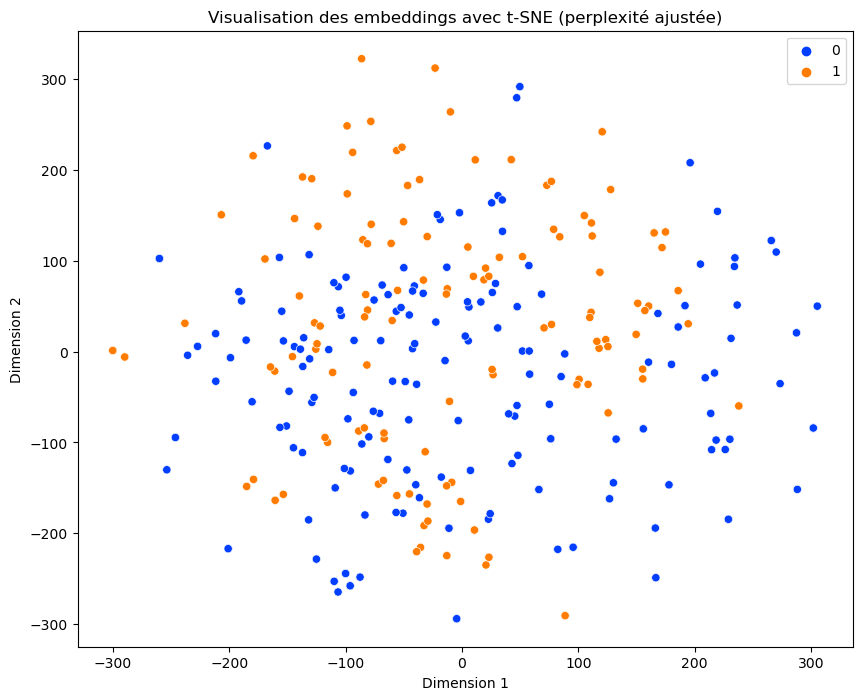

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

# Convertir le texte en embeddings
embeddings = data['Commentaires'].apply(lambda x: text_to_embedding(x, word2vec_model))
x = np.vstack(embeddings)
y = data['Malade'].values

# Diviser le dataset en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Appliquer t-SNE pour réduire les dimensions à 2D avec perplexité ajustée
tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # Vous pouvez ajuster la perplexité ici
x_train_tsne = tsne.fit_transform(x_train)


# Visualiser les données avec Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_train_tsne[:, 0], y=x_train_tsne[:, 1], hue=y_train, palette='bright')
plt.title('Visualisation des embeddings avec t-SNE (perplexité ajustée)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


# Fonction pour entrainer et evoluer le model

In [20]:
def train_and_evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malade', 'Pas Malade'], yticklabels=['Malade', 'Pas Malade'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()
    return accuracy

# Entraîner et évaluer le modèle de régression logistique

Logistic Regression:
Accuracy: 0.6788321167883211

Classification Report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        93
           1       0.00      0.00      0.00        44

    accuracy                           0.68       137
   macro avg       0.34      0.50      0.40       137
weighted avg       0.46      0.68      0.55       137



C:\Users\DAFFE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DAFFE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DAFFE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


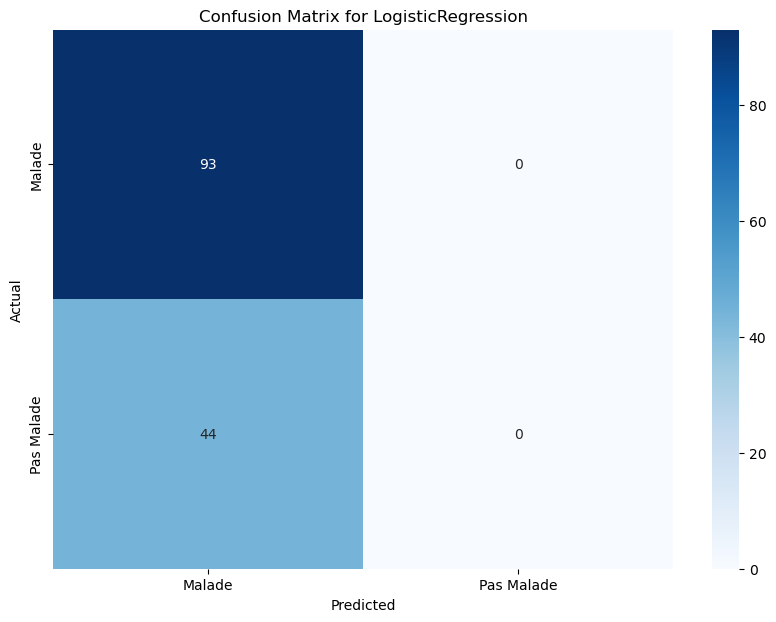

In [21]:
print("Logistic Regression:")
logistic_model = LogisticRegression()
logistic_accuracy = train_and_evaluate_model(logistic_model,x_train, x_test, y_train, y_test)
plt.show()

# Entraîner et évaluer le modèle de forêt aléatoire

Random Forest:
Accuracy: 0.9562043795620438

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        93
           1       0.91      0.95      0.93        44

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137



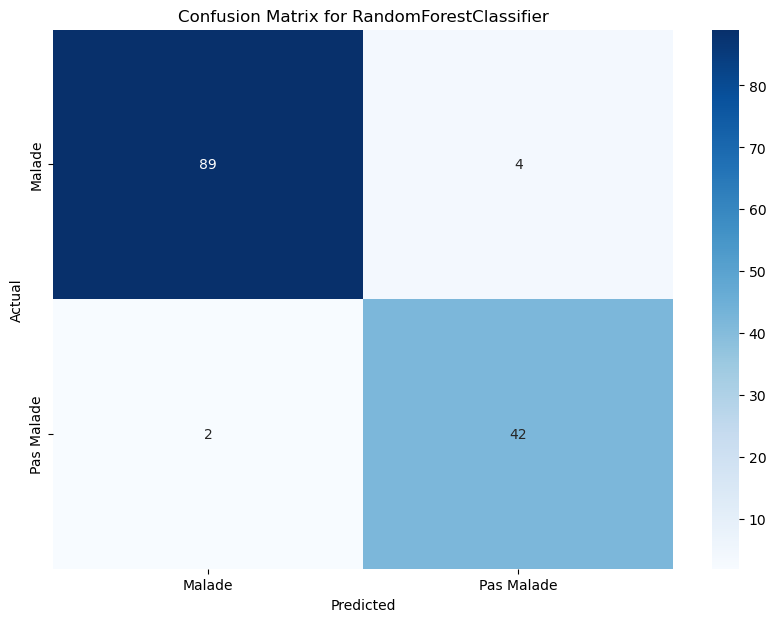

In [22]:
print("Random Forest:")
rf_model = RandomForestClassifier()
rf_accuracy = train_and_evaluate_model(rf_model, x_train, x_test, y_train, y_test)

# Entraîner et évaluer le modèle SVM

Support Vector Machine:
Accuracy: 0.7591240875912408

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        93
           1       0.87      0.30      0.44        44

    accuracy                           0.76       137
   macro avg       0.81      0.64      0.64       137
weighted avg       0.78      0.76      0.72       137



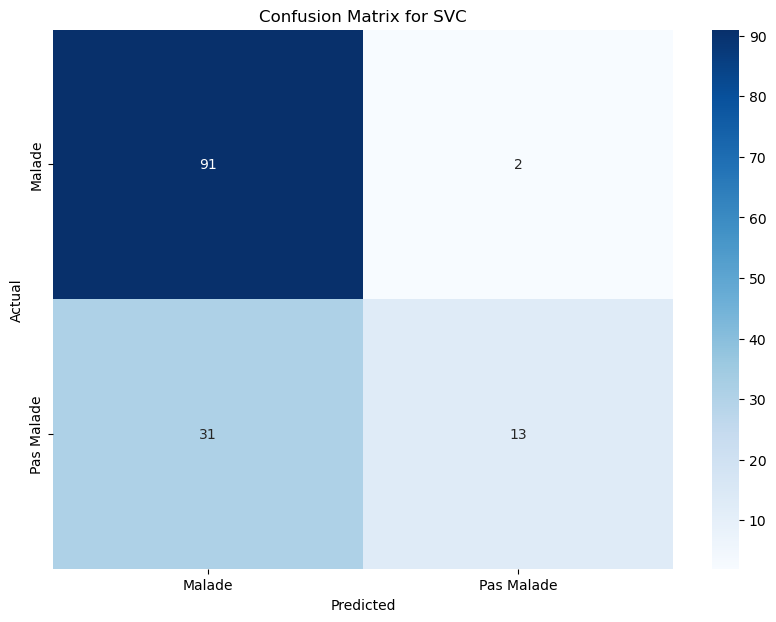

In [23]:
print("Support Vector Machine:")
svm_model = SVC() 
svm_accuracy = train_and_evaluate_model(svm_model, x_train, x_test, y_train, y_test)

# Comparaison des modèles

In [24]:
models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine']
accuracies = [logistic_accuracy, rf_accuracy, svm_accuracy]

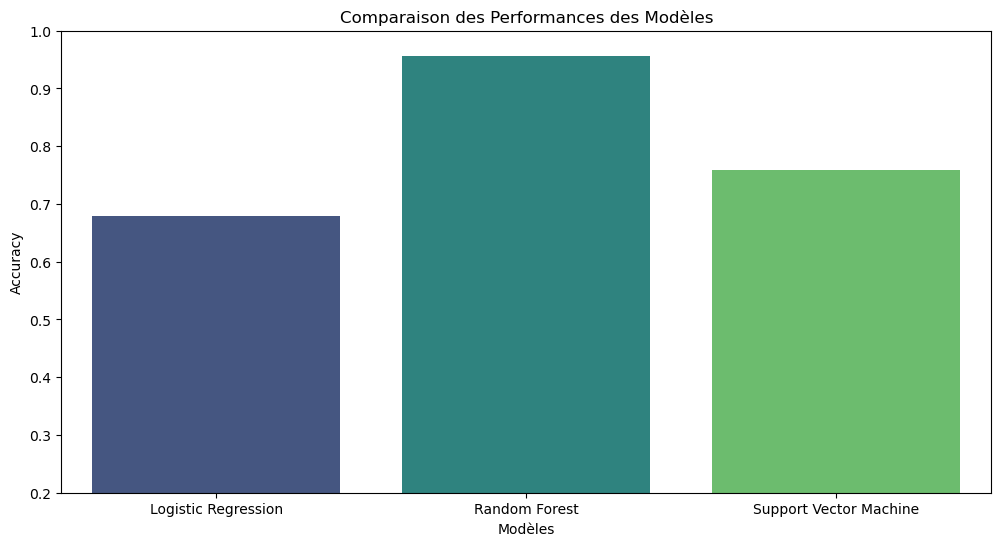

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.xlabel('Modèles')
plt.ylabel('Accuracy')
plt.title('Comparaison des Performances des Modèles')
plt.ylim(0.2, 1.0)
plt.show()

# Prédiction et interprétation du résultat avec chaque modèle

In [26]:
# Nouveau texte brut pour la prédiction
new_commentaire =  "poutine ne sent pas bien"



# Prétraiter le nouveau texte
preprocessed_text = preprocess_text(new_commentaire)

# Convertir en embedding
embedding = text_to_embedding(preprocessed_text, word2vec_model)

# Prédiction et interprétation du résultat avec chaque modèle
def predict_new_text(model, embedding):
    prediction = model.predict([embedding])[0]
    if prediction == 1:
        print(f"poutine est malade selon {model.__class__.__name__}.")
    else:
        print(f"poutine n'est pas malade selon {model.__class__.__name__}.")

print("\nPrédictions pour le nouveau Commentaire selon les Model suivantes:\n")

predict_new_text(logistic_model, embedding)
print("\n")
predict_new_text(rf_model, embedding)
print("\n")
predict_new_text(svm_model, embedding)


Prédictions pour le nouveau Commentaire selon les Model suivantes:

poutine n'est pas malade selon LogisticRegression.


poutine n'est pas malade selon RandomForestClassifier.


poutine n'est pas malade selon SVC.


# Definition des paramettres de Classification Report

#### Definition de Recall

In [27]:
#Rappel (Recall) : Le rappel mesure la proportion d'instances réellement 
#positives qui sont prédites comme positives par le modèle.
#C'est le nombre de vrais positifs divisé par le nombre de vrais positifs et de faux négatifs
#.Une valeur élevée de rappel indique que le modèle capture la plupart des vrais positifs


### Definition F1-score

In [28]:
#F1-score : Le F1-score est la moyenne harmonique de la précision et du rappel.
#Il est calculé en prenant deux fois le produit de la précision et du rappel,
#puis en le divisant par leur somme. Le F1-score est utile lorsque vous voulez 
#une seule mesure qui tient compte à la fois de la précision et du rappel.


In [29]:
#Précision (Precision) : La précision mesure la proportion d'instances prédites
#comme positives qui sont réellement positives. 
#C'est le nombre de vrais positifs divisé par le nombre de vrais positifs et de faux positifs
#. Une valeur élevée de précision indique que le modèle ne prédit pas trop de faux positifs.

### Definition du Support

In [30]:
#Support : Le support est le nombre d'occurrences de chaque classe dans l'ensemble de données.

### Definition de weighted F1-score

In [31]:
#F1-score pondéré (weighted F1-score) : Le F1-score pondéré est la moyenne pondérée du 
#F1-score pour chaque classe, calculée par rapport au nombre d'échantillons de chaque classe.


# Introduction
Le projet visait à développer des modèles d'apprentissage automatique pour détecter les fausses nouvelles en utilisant trois algorithmes principaux : Régression Logistique, Forêt Aléatoire et Support Vector Machine (SVM). Les résultats ont été comparés en termes de précision, de rapport de classification et de matrices de confusion.

.# Comparaison des Modèles


Forêt Aléatoire a obtenu la meilleure précision (95%), suivi de la SVM (75) et de la Régression Logistique (67%). Le modèle 
Forêt Aléatoire a également montré des résultats impressionnants en termes de rappel et de précision pour les deux classes

# Conclusion

RandomForestClassifier() avec une précision de 0,9562, SVM avec une précision de 0,7591, et LogisticRegression() avec une précision de 0,6788. L'analyse et la comparaison des trois modèles montrent que la Forêt Aléatoire est la plus performante pour la détection des fausses nouvelles, suivie par le Support Vector Machine (SVM) et la Régression Logistique. Les résultats obtenus démontrent que l'utilisation de l'apprentissage automatique, en particulier des modèles de Forêt Aléatoire, peut être très efficace pour préserver l'intégrité des processus électoraux en détectant et en atténuant la propagation des fausses nouvelles.

Les prochaines étapes pourraient inclure l'intégration de plus de données d'entraînement, l'ajustement des hyperparamètres des modèles, et l'exploration d'autres algorithmes d'apprentissage automatique pour continuer à améliorer les performances de la détection des fake news.